In [15]:
%%HTML
    
<!-- reveal.js CSS theme and local overrides -->
<link rel="stylesheet" href="https://fonts.googleapis.com/css?family=Open+Sans:300,400,600,700&amp;lang=en"/>
<link rel="stylesheet" href="https://fonts.googleapis.com/css?family=Merriweather:italic&amp;lang=en"/>
<link rel="stylesheet" href="stylefiles/presentation.css"/> 

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as anim
import matplotlib.gridspec as gridspec
from IPython.display import HTML
from teaspoon.SP.tsa_tools import takens
import teaspoon.MakeData.DynSysLib.DynSysLib as DSL
def step_2d_takens(i):
    system = 'driven_pendulum'
    dynamic_state = 'periodic'
    t, ts = DSL.DynamicSystems(system, dynamic_state)
    embedded_ts = takens(ts[0], n = 2, tau = i)
    data.set_data(embedded_ts.T[0], embedded_ts.T[1])
    true.set_data(ts[0], ts[1])
    
    ax.set_title(rf'$\tau$={i}')
    ax.set_xlabel(r'$\theta$')
    ax.set_ylabel(r'$\dot{\theta}}$')
    ax.legend()
    
    plt.tight_layout()

<section id="title-slide"> 
    <br><br><br><h1><i>Module 1: Time Delay Embedding and Attractor Reconstruction</i></h1>
    <h3><i>Methods for Automatically Selecting Embedding Parameters</i></h3>
    <br><br>
    <h4><i>5/15/2023</i></h4>
    <br><br>
    <div id='title-slide' class="pull-right"><img id="logo" src="figures/msu_seal.png" width="100%" height="100%"></div>
    <div class="uu_title_container">
        <smaller>
        <div>
            <b>Presented by:</b> Your Name
            <br><br><br><br>
            <b>Topological Signal Processing for Dynamical Systems</b><br>
            SIAM-DS Minitutorial 2023
        </div>  
        </smaller>
    </div><br>
    <div class='footer'>
        Michigan State University
    </div>
</section>

# Big picture intro slide 

<br/><br/><br/><br/><br/><br/><br/><br/>
## Goals of this module


- Understand how to embed a timeseries signal in higher dimensions.
- Apply different methods for selecting delay and dimension for a timeseries embedding.


  
  
# Motivation - Single Pendulum


<div class = 'row'>
<div class = 'column'>

## Driven Single Pendulum

    
- $\begin{bmatrix}\dot{\theta}\\\dot{\omega}\end{bmatrix}=\begin{bmatrix}0 & \omega\\-\frac{g}{l}\sin{(\theta)} & -c\omega\end{bmatrix} + \begin{bmatrix}0\\\frac{A}{m l^2}\sin{(\omega_m t)}\end{bmatrix}$

- $\omega=\frac{d\theta}{dt}$
    
- $m=1~kg$, $g=9.81~\frac{m}{s^2}$, $l=1~m$
- $c=0.1~/s$ (Damping)
- $A=5.0~Nm$ (Forcing Amplitude)
</div>
<div class = 'column' style="max-width:30%">
<img style="padding: 20px 20px 20px 20px;" src="figures/2-1_single_pendulum.png"></img>
</div>
</div>

- Teaspoon dynamic systems library
- 60+ dynamical systems 

# Motivation - State Space

<div class = 'row'>
<div class = 'column'>

## Driven Single Pendulum

    
- Teaspoon dynamic systems library
- 60+ dynamical systems 
    
   
</div>
<div class = 'column' style="max-width:30%">

<img style="padding: 20px 20px 20px 20px;" src="figures/2-1_single_pendulum.png"></img>

</div>
</div>

In [3]:
# Easily generate new dynamic system simulations with the teaspoon make data module
import teaspoon.MakeData.DynSysLib.DynSysLib as DSL

system = 'driven_pendulum'
dynamic_state = 'periodic'
t, ts = DSL.DynamicSystems(system, dynamic_state)

# Motivation - State Space

- Plot the state space solution 

![](figures/2-1_pendulum_ss.png)

- Attractor contains valuable information about the original system (e.g. periodic)

- What if we only had equipment to measure the angle and not the angular velocity?

# Takens Embedding

![](figures/2-1_takens_embedding_gif_2d.gif)


**Takens Theorem:** The embedded state space attractor has the same topology of the original system if the correct dimension and delay are chosen.

Teaspoon function:
```python
teaspoon.SP.tsa_tools.takens(ts, n=None, tau=None)
```

## Delay Impact on Attractor Topology

<IPython.core.display.Javascript object>


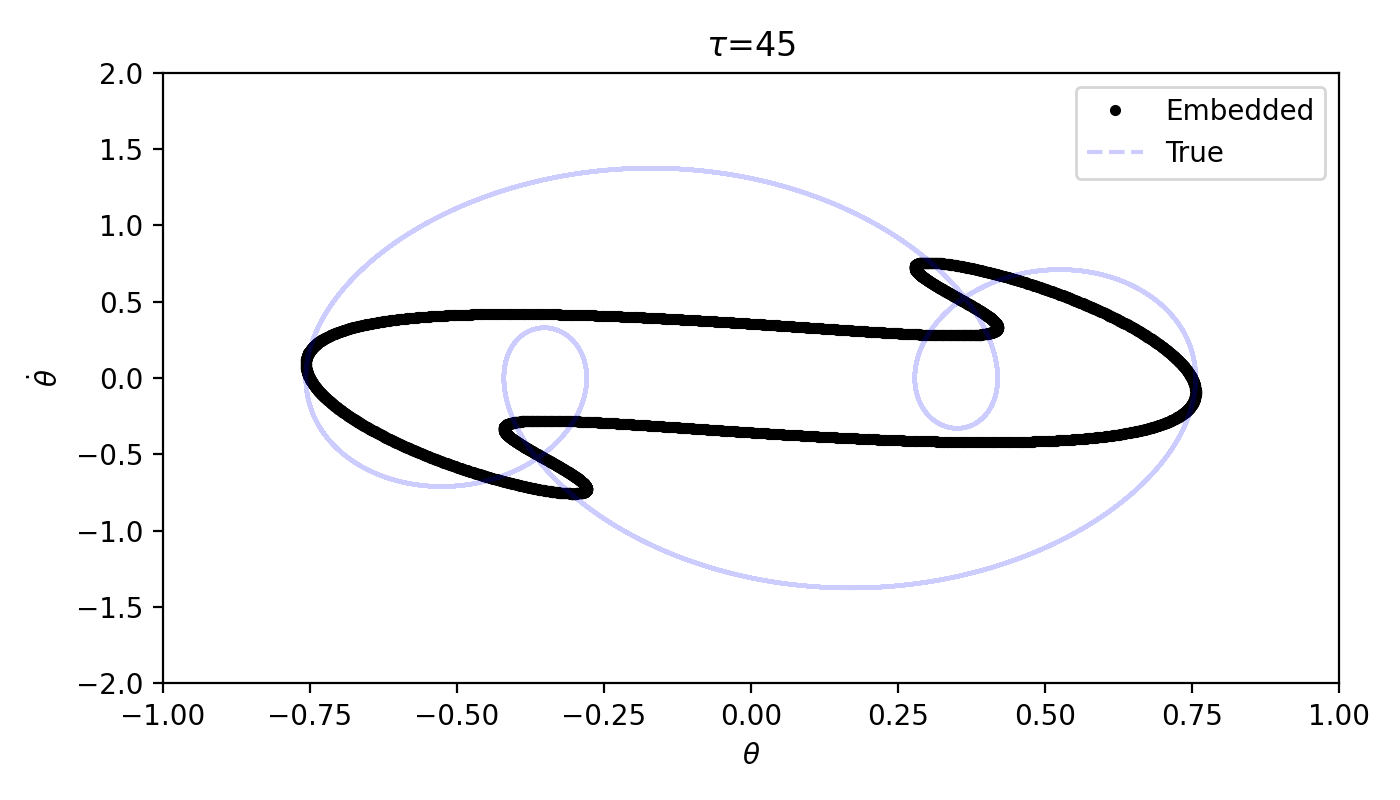

In [17]:
%matplotlib notebook
from teaspoon.SP.tsa_tools import takens
fig = plt.figure(figsize=(7, 4))
ax = plt.subplot()
ax.axis([-1,1,-2,2])
data, = ax.plot([],[], 'k.', label='Embedded')
true, = ax.plot([],[],'--b', alpha=0.2, label='True')
animation = anim.FuncAnimation(fig, step_2d_takens, frames=100, interval=100, blit=True)
plt.show()

In [22]:
# Stop the animation
%matplotlib notebook

# Embedding Dimension

![](figures/2-1_takens_embedding_gif_3d.gif)

# Parameter Selection

- How do we choose the embedding dimension $n$ and delay $\tau$?

### Delay [1]

![](figures/2-1_delay_methods.png)

# Parameter Selection

- How do we choose the embedding dimension $n$ and delay $\tau$?

### Dimension [1]

![](figures/2-1_dimension_methods.png)

# Parameter Selection - $\tau$

![](figures/2-1_delay_methods_frequency.png)

# Frequency Approach - Overview

<br/><br/><br/><br/>

![](figures/2-1_LMS_procedure.pdf)

<br/><br/><br/><br/>

# Frequency Approach - Methodology

- Frequency Criteria: $2f_{max}< f_s < 4f_{max}$ [2,3]

- $f_{max}$: Maximum significant frequency in the system

- $f_s$: Sampling frequency

- How can $f_{max} be determined automatically for an oversampled timeseries?


![](figures/2-1_fft_cutoff.png)

# Frequency Approach - Cutoff Frequency
#### Steps:

- GWN Fourier Transform Distribution: $P_{|X|}(|X|) = \frac{2|X|}{E_w \sigma_x^2} e^{\frac{-|X|^2}{E_w \sigma_x^2}}$
- $E_w$: Window energy


![](figures/2-1_FFTdistributions.pdf)

# Frequency Approach - Cutoff Frequency

- Get an approximate $|X_{max}|$ from the 1D LMS regression of the FFT.
- Robust up to 50% outliers

- Compute $\sigma_x = \sqrt{\frac{2|X_{max}|^2}{E_w}}$ (Theoretical maximum)

- Use the CDF to solve for the cutoff: $CP_{|X|} = 1 - \exp\left({\frac{-|X|^2}{E_w \sigma_X^2}}\right)$

### Cutoff Ratio: $C = \frac{|X|_{\text{cutoff}}}{|X|_{\text{max}}} = \sqrt{-2\ln{(1-CP)}}$ 

- Reccomended cutoff ratio $\approx 6$ for $10^4$ data points.

![](figures/2-1_PDFvCDF.png)

# Frequency Approach - Finding $\tau$

- The delay is then computed as: $\tau = \frac{f_s}{\alpha f_{max}}$
- Set $\alpha=2$ to satisfy Nyquist sampling criteria

<br/><br/><br/><br/>

![](figures/2-1_LMS_procedure.pdf)

# Frequency Approach - Teaspoon Functions

Teaspoon functions:
```python
teaspoon.parameter_selection.delay_LMS.AbsFFT(ts, fs)
``` 
- _AbsFFT_ - Returns fft coordinates of a timeseries

```python
teaspoon.parameter_selection.delay_LMS.LMSforDelay(ts, fs, plotting=False)
``` 
- _LMSforDelay_ - Computes embedding delay using LMS regression to find cutoff for the maximum significant frequency.

```python
teaspoon.parameter_selection.delay_LMS.MaximumFrequency(xf, yf, cutoff)
``` 
- _MaximumFrequency_ - Gives maximum frequency in fft at a given cutoff threshold.

### Example:

In [6]:
import teaspoon.MakeData.DynSysLib.DynSysLib as DSL
from teaspoon.parameter_selection.delay_LMS import LMSforDelay
t, ts = DSL.DynamicSystems('driven_pendulum', 'periodic')
LMSforDelay(ts[0], 50)

29

# Parameter Selection - $\tau$

![](figures/2-1_delay_methods_mspe.png)

# Multiscale Permutation Entropy (MsPE/MPE)

- Study the distribution of permutation groups in a signal by varying $\tau$
![](figures/2-1_motifs.png)

- $h_n  = -\frac{1}{\log_2{n!}} \sum{} p(\pi_i) \log_2{p(\pi_i)}$

![](figures/2-1_Regions_ABC.PNG)

# Multiscale Permutation Entropy

- Dip in MSPE occurs around half of the system period. [4]
- $d_2 = \frac{P}{2}=\frac{1}{f_s}\tau_r$
![](figures/2-1_MdPE.PNG)

- $\tau=\frac{2}{\alpha}\tau_r$ for $\alpha \in [2,4]$ [1]
- $\tau_r$ is the resonance delay at MPE dip ($d_2$)

# Multiscale Permutation Entropy

- Dip in MPE plot may not always be present due to nonlinear effects. E.g. Chaotic Lorenz system MPE plot.

![](figures/2-1_delay_segments.png)

- Take $\tau$ to be delay at maximum MPE in this case

# MsPE Example

### Teaspoon Function:

```python
teaspoon.parameter_selection.MsPE.MsPE_tau(time_series, delay_end=200, plotting=False)
```
- Compute the timeseries embedding delay using multiscale permutation entropy.

### Example:

<Figure size 640x480 with 0 Axes>

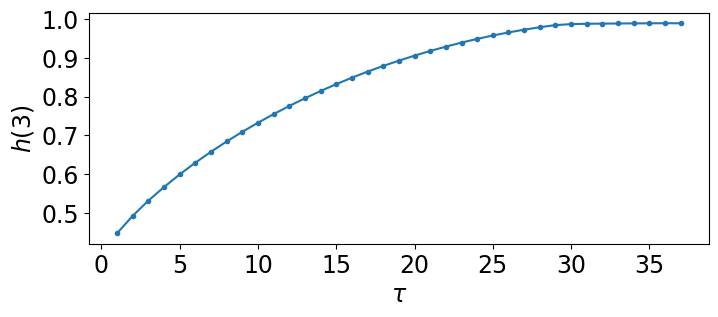

36

In [14]:
import teaspoon.MakeData.DynSysLib.DynSysLib as DSL
from teaspoon.parameter_selection.MsPE import MsPE_tau
t, ts = DSL.DynamicSystems('driven_pendulum', 'periodic')
MsPE_tau(ts[0], plotting=True)

# Parameter Selection - $\tau$

![](figures/2-1_delay_methods_autocor.png)

# Autocorrelation

- Compute the correlation function between the signal and its delayed version.

- Correlation coefficient/function: $\rho(\tau)$

- $\tau$ is taken as the point when $\rho= 1/e \approx 0.3679$ (folding time) [5]

### Teaspoon Function:

```python
teaspoon.parameter_selection.autocorrelation.autoCorrelation_tau(ts, cutoff=0.36788, AC_method='spearman', plotting=False)
```

# Autocorrelation - Example

In [8]:
import teaspoon.MakeData.DynSysLib.DynSysLib as DSL
from teaspoon.parameter_selection.autocorrelation import autoCorrelation_tau
t, ts = DSL.DynamicSystems('driven_pendulum', 'periodic')
autoCorrelation_tau(ts[0])

42

![](figures/2-1_autocor_plot.png)

# Parameter Selection - $\tau$

![](figures/2-1_delay_methods_mutual_info.png)

# Mutual Information

![](figures/2-1_mutual_information.gif)

# Mutual Information

- $I(X;Y) = \sum_{x \in X} \sum_{y \in Y}p(x,y)\log\frac{p(x,y)}{p(x)p(y)}$ [6]

- Compute MI between $x(t)$ and $x(t-\tau)$

- First minimum in $I$ specifies optimal $\tau$

- <span style="color:red">Warning:</span> a minimum is not guaranteed for $I$
- *Try different binning methods*

### Teaspoon Function:
```python
teaspoon.parameter_selection.MI_delay.MI_for_delay(ts, plotting=False, method='basic', 
                                                   h_method='sturge', k=2, ranking=True)
```

# Mutual Information Example

In [20]:
from teaspoon.parameter_selection.MI_delay import MI_for_delay
import teaspoon.MakeData.DynSysLib.DynSysLib as DSL
t, ts = DSL.DynamicSystems('driven_pendulum', 'periodic')
# kraskov 1 method uses partitioning based on 1 nearest neighbor in MI function
# (Estimating mutual information. Physical Review E, 69(6), jun 2004.)
MI_for_delay(ts[0], method='kraskov 1')

16

![](figures/2-1_mi_example.png)

# Parameter Selection - $\tau$

![](figures/2-1_delay_methods_pami.png)

# Permutation Auto-Mutual Information (PAMI)

- Estimating $\tau$ with MI does not account for permutations.

- PAMI measures joint probability between permutations at $\tau=1$ to larger delays.

- $I_p(\tau, n) = H_{x(t,n)} + H_{x(t+\tau,n)} - H_{x(t,n), x(t+\tau,n)}$ [7]
- where $H$ is the permutation entropy: $H_s(n) = -\sum{} p(x_i) \log{p(x_i)}$

- Plot $I_p$ with $(n-1)\tau$ and find minimum when $n=2$
![](figures/2-1_PAMI.png)

# Permutation Auto-Mutual Information (PAMI)

### Teaspoon Function:

```python
teaspoon.parameter_selection.PAMI_delay.PAMI_for_delay(ts, n=5, plotting=False)
```

### Example:

<IPython.core.display.Javascript object>


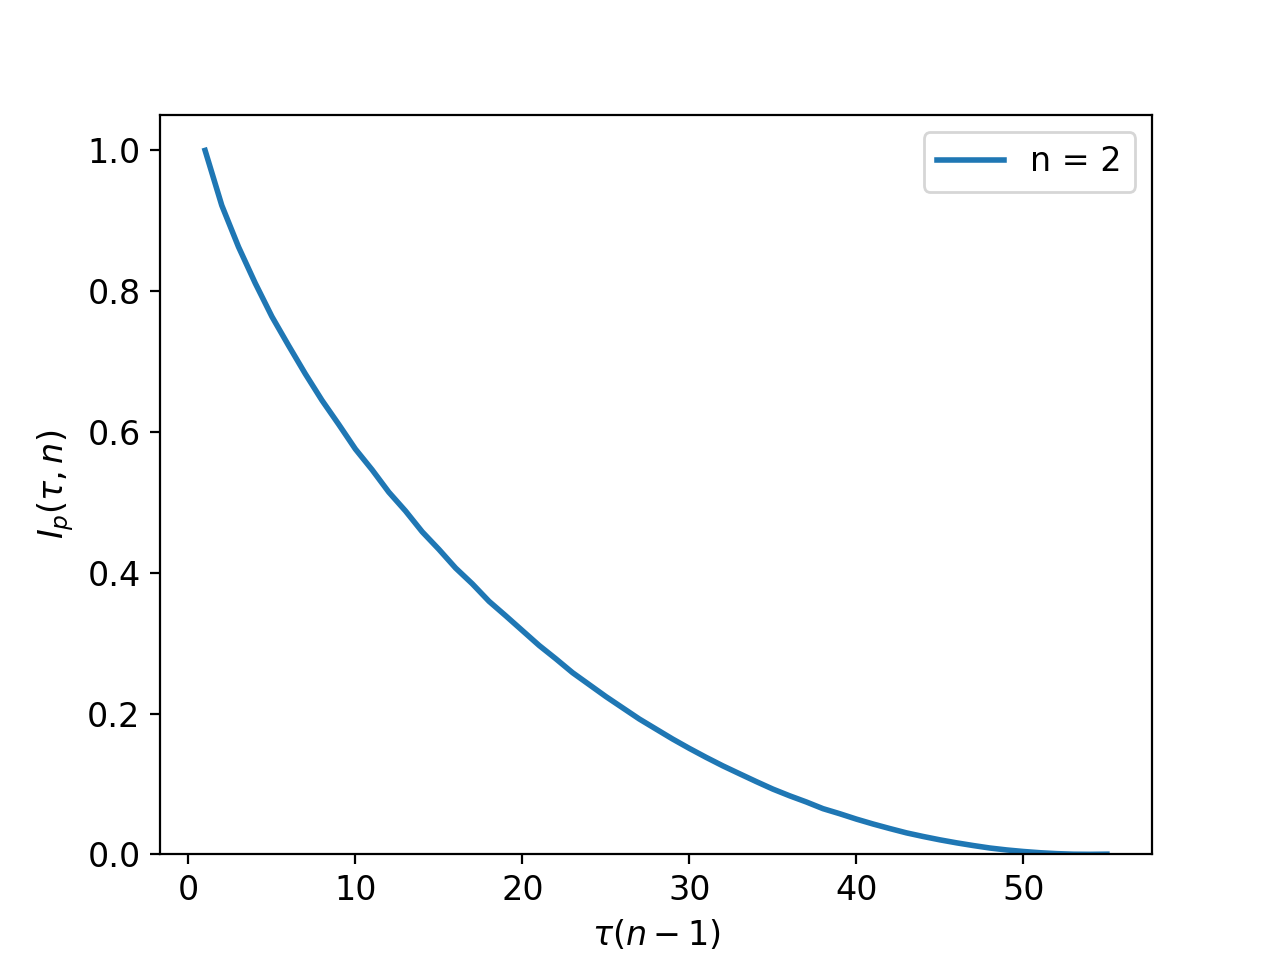

13

In [10]:
from teaspoon.parameter_selection.PAMI_delay import PAMI_for_delay
import teaspoon.MakeData.DynSysLib.DynSysLib as DSL
t, ts = DSL.DynamicSystems('driven_pendulum', 'periodic')
PAMI_for_delay(ts[0], n=5, plotting=True)


# **Exercise:** Estimate the embedding delay for the periodic and chaotic _Rossler_ system using the five methods discussed.

### Explore the embedded attractor point cloud persistence diagrams and how they compare to the full system persistence diagrams.

- See **2-1-Wkst-Embedding.ipynb** part 1.

![](figures/2-1_delay_methods.png)

# Parameter Selection - $n$

### Dimension [1]

![](figures/2-1_dimension_methods_fnn.png)

# False Nearest Neighbors (FNN)

- Embed the system in increasing dimensions and compute distances between nearest neighbors.

- FNN Fraction: $R_{i} = \sqrt{\frac{d^2_{m+1}(i,j) - d^2_{m}(i,j)}{d^2_{m}(i,j)}}$, False Nearest Neighbor if $R_i > R_{tol}$ (we use $R_{tol}=15$)

![](figures/fnn_animation.gif)

# False Nearest Neighbors 

### Teaspoon Function:

```python
teaspoon.parameter_selection.FNN_n.FNN_n(ts, tau, maxDim=10, plotting=False, Rtol=15, Atol=2, threshold=10)
```
<font color=red>Warning: This requires estimating the delay first.</font>
### Example:


<IPython.core.display.Javascript object>


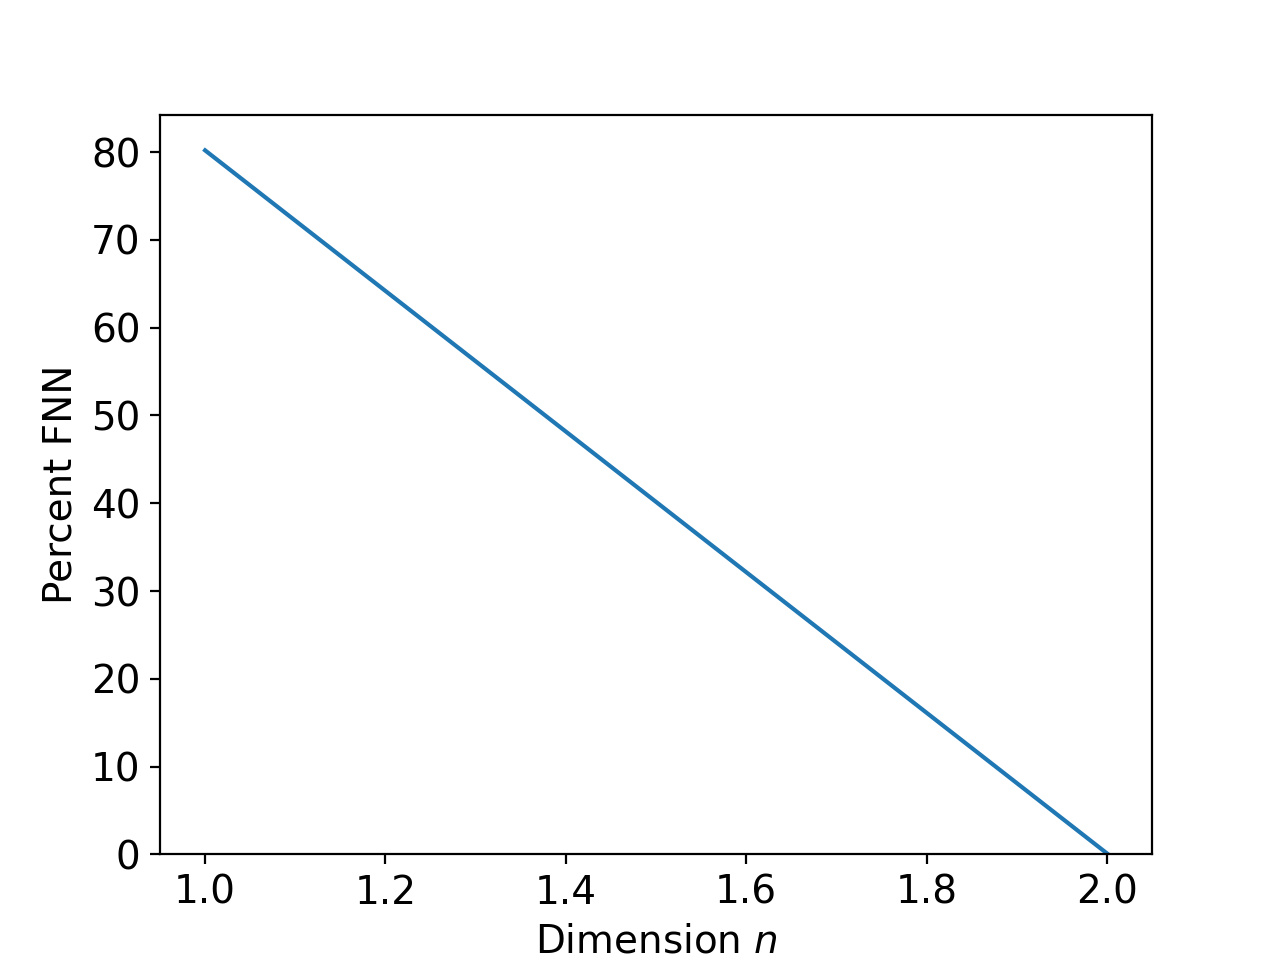

FNN embedding Dimension:  2


In [21]:
from teaspoon.parameter_selection.FNN_n import FNN_n
import teaspoon.MakeData.DynSysLib.DynSysLib as DSL
t, ts = DSL.DynamicSystems('driven_pendulum', 'periodic')
# Use PAMI delay 13
perc_FNN, n = FNN_n(ts[0], 13, plotting = True)
print('FNN embedding Dimension: ',n)

# False Nearest Strands [8]

- New functionality being added to teaspoon soon. 
- Useful for systems with significant noise.  

- Assigns nearest neighbors to groups called strands based on successive nearest neighbor indices.

- False nearest strand if $\left<d_{m+1}(i,j)\right>_k > s\sigma_x$ ($\sigma_x$ - Standard Deviation, $s$ is threshold we use 0.5 by default)

- The $k^{th}$ strand: $S_k=\left<d_{m+1}(i,j)\right>_k = \frac{1}{||S_k||}\sum_{i\in S_k}d_{m+1}(i,j)$

### Teaspoon:

Set:

```python
strands=True
```
in
```python
teaspoon.parameter_selection.FNN_n.FNN_n(ts, tau, maxDim=10, plotting=False, Rtol=15, Atol=2, threshold=10)
```


# Parameter Selection - $n$

### Dimension [1]

![](figures/2-1_dimension_methods_mspe.png)

# Multiscale Permutation Entropy - $n$

- Normalize MPE as $h'_n = \frac{1}{n-1}H(n)$
- $n$ with largest $h'(n)$ is sufficient dimension [9]

- <font color=red>Warning: Requires estimating $\tau$</font>

### Teaspoon function:

```python
teaspoon.parameter_selection.MsPE.MsPE_n(time_series, delay, m_start=3, m_end=7, plotting=False)
```

# Multiscale Permutation Entropy - $n$

### Example:

<Figure size 640x480 with 0 Axes>

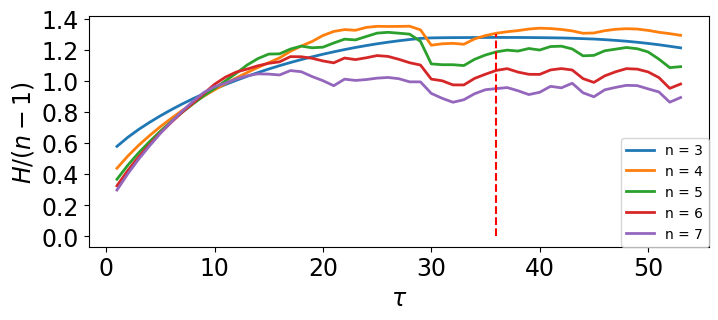

Embedding Dimension:   4


In [13]:
from teaspoon.parameter_selection.MsPE import MsPE_n,  MsPE_tau
import teaspoon.MakeData.DynSysLib.DynSysLib as DSL
t, ts = DSL.DynamicSystems('driven_pendulum', 'periodic')

tau = int(MsPE_tau(ts[0], plotting = False))
n = MsPE_n(ts[0], tau, 3, 7, plotting = True)
print('Embedding Dimension:   '+str(n))


# **Exercise:** Estimate the embedding _dimension_ for the periodic and chaotic _Rossler_ system using the five methods discussed.

### Explore the embedded attractor point cloud persistence diagrams and how they compare to the full system persistence diagrams.

- See **2-1-Wkst-Embedding.ipynb** part 2.

![](figures/2-1_dimension_methods.png)

# Thank you!


- These parameter selection methods are covered in more detail in our paper:

_Myers, A., and F. A. Khasawneh. "On the automatic parameter selection for permutation entropy." Chaos (Woodbury, NY) 30.3 (2020): 033130-033130._

![](figures/2-1_takens_embedding_gif_3d.gif)

# References

1. Myers, A., & Khasawneh, F. A. (2020). On the automatic parameter selection for permutation entropy<? A3B2 show [editpick]?>. Chaos: An Interdisciplinary Journal of Nonlinear Science, 30(3), 033130.

2. Melosik, Michał, and W. Marszalek. "On the 0/1 test for chaos in continuous systems." Bulletin of the Polish Academy of Sciences: Technical Sciences 3 (2016).

3. Landau, H. J. "Sampling, data transmission, and the Nyquist rate." Proceedings of the IEEE 55.10 (1967): 1701-1706.

4. Zunino, Luciano, et al. "Permutation-information-theory approach to unveil delay dynamics from time-series analysis." Physical Review E 82.4 (2010): 046212.

5. Kantz, Holger, and Thomas Schreiber. Nonlinear time series analysis. Vol. 7. Cambridge university press, 2004.

6. Shannon, Claude E. "A mathematical theory of communication." The Bell system technical journal 27.3 (1948): 379-423.

7. Liang, Zhenhu, et al. "Permutation auto-mutual information of electroencephalogram in anesthesia." Journal of neural engineering 10.2 (2013): 026004.

8. Chelidze, David. "Reliable estimation of minimum embedding dimension through statistical analysis of nearest neighbors." Journal of Computational and Nonlinear Dynamics 12.5 (2017).

9. Riedl, Maik, Andreas Müller, and Niels Wessel. "Practical considerations of permutation entropy: A tutorial review." The European Physical Journal Special Topics 222.2 (2013): 249-262.